# prova

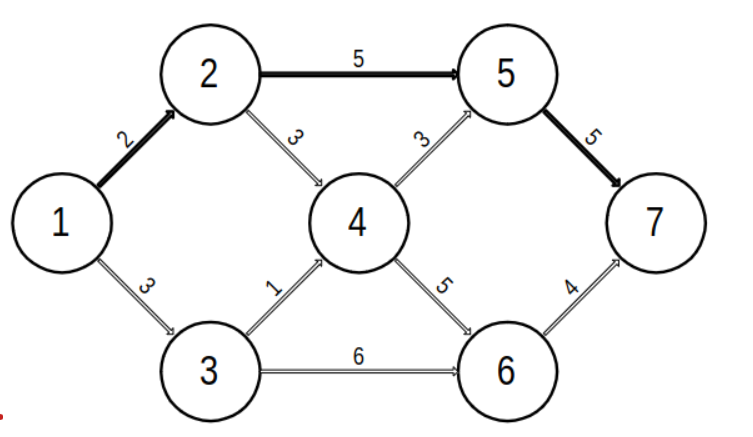

In [16]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np


In [17]:
# Criando o grafo G
G = nx.DiGraph()
G.add_nodes_from([1, 2, 3, 4, 5, 6,7])
G.add_weighted_edges_from([
    (1, 2, 2), (1,3,3),
    (2, 5, 5),(2,4,3),
    (3,4,1),(3,6,6),
    (4,5,3),(4,6,5),
    (5,7,5),
    (6,7,4)
    
])

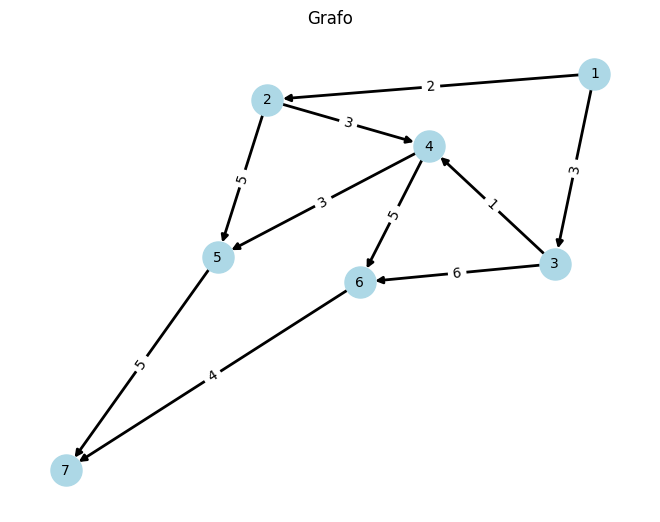

In [18]:
# Desenhando o grafo
pos = nx.spring_layout(G)
edge_labels = {(u, v): d['weight'] for u, v, d in G.edges(data=True)}
nx.draw(G, pos, with_labels=True, node_size=500, node_color='lightblue', font_size=10, font_color='black', width=2, arrows=True)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title("Grafo")
plt.show()

# questão 1:
2° PASSO: Considerando os quatro possíveis algoritmos para definir o caminho mínimo de um vértice a todos os outros vértices de um grafo (busca em largura; ordenação topológica; Dijkstra; e Bellman-Ford), justifique a viabilidade, bem como os prós e os contras da escolha de cada um destes algoritmos em relação ao grafo escolhido;



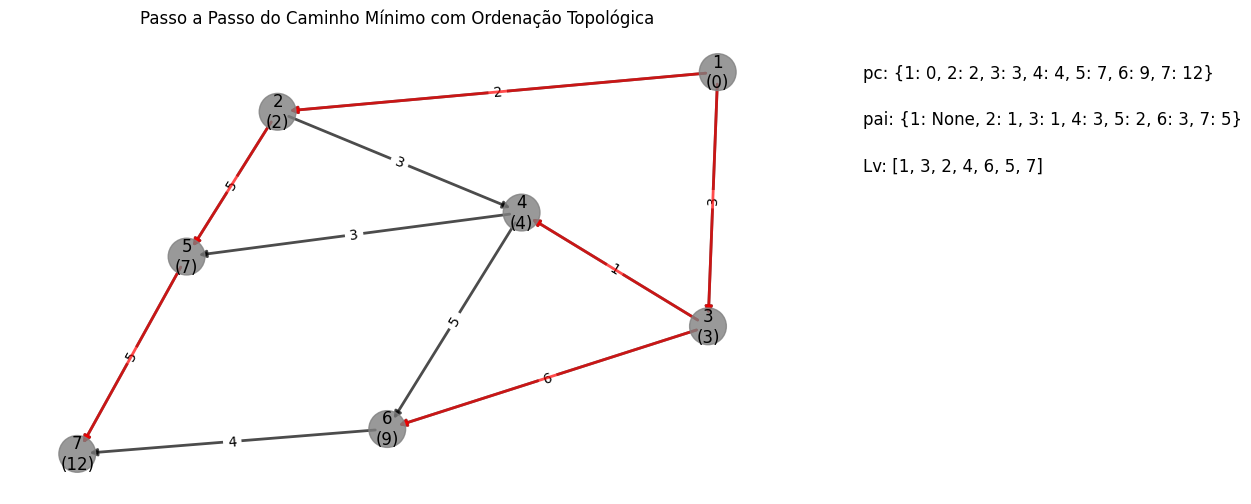

In [19]:
def OrdTopologica(G):
    marca = {v: 'I' for v in G.nodes()}  # Marcas para cada vértice
    Lv = []  # Lista para ordenação topológica
    
    def dfs_visit(vd):
        marca[vd] = 'D'
        for vadj in G.adj[vd]:
            if marca[vadj] == 'I':
                dfs_visit(vadj)
        marca[vd] = 'E'
        Lv.insert(0, vd)  # Inserindo na cabeça da lista
    
    for v in G.nodes():
        if marca[v] == 'I':
            dfs_visit(v)
    
    return Lv

def CM_ordTopologica(G, vo):
    pc = {v: float('inf') for v in G.nodes()}  # Vetor de pesos mínimos
    pai = {v: None for v in G.nodes()}  # Vetor de predecessores
    pc[vo] = 0
    Lv = OrdTopologica(G)
    
    for v in Lv:
        for vadj in G.adj[v]:
            if pc[vadj] > pc[v] + G[v][vadj]['weight']:
                pc[vadj] = pc[v] + G[v][vadj]['weight']
                pai[vadj] = v
    
    return pc, pai, Lv

def plot_CM_ordTopologica(G, vo):
    pc, pai, Lv = CM_ordTopologica(G, vo)
    
    # Criando o plot para o Algoritmo de Caminho Mínimo com Ordenação Topológica
    plt.figure(figsize=(10, 6))
    pos = nx.spring_layout(G)
    edge_labels = {(u, v): d['weight'] for u, v, d in G.edges(data=True)}
    
    node_colors = ['lightblue' if node not in pc else 'gray' for node in G.nodes()]
    node_labels = {node: str(node) + f"\n({pc[node]})" for node in G.nodes()}
    
    nx.draw_networkx_edges(G, pos, edgelist=G.edges(), edge_color='black', width=2, alpha=0.7)
    nx.draw_networkx_nodes(G, pos, node_size=700, node_color=node_colors, alpha=0.8)
    nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=12)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)
    
    if pai:
        path_edges = [(pai[node], node) for node in pai if pai[node] is not None]
        nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=2, alpha=0.7)
    
    plt.text(1.1, 0.9, f"pc: {pc}", transform=plt.gca().transAxes, fontsize=12)
    plt.text(1.1, 0.8, f"pai: {pai}", transform=plt.gca().transAxes, fontsize=12)
    plt.text(1.1, 0.7, f"Lv: {Lv}", transform=plt.gca().transAxes, fontsize=12)
    
    plt.title("Passo a Passo do Caminho Mínimo com Ordenação Topológica")
    plt.axis('off')
    plt.show()
    


# Executando e plotando o Algoritmo de Caminho Mínimo com Ordenação Topológica
plot_CM_ordTopologica(G, vo=1)

## 4

IndexError: list index out of range

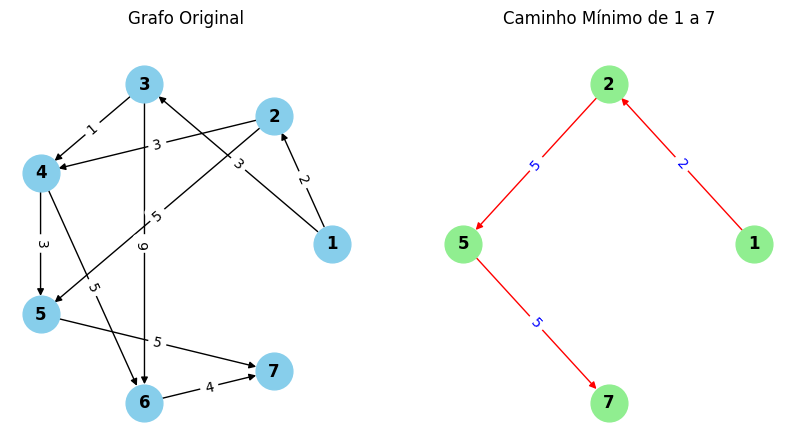

In [20]:
# Função para plotar as matrizes Pc e pai
def plot_matrizes(Pc, pai, title):
    labels = [f'v{i}' for i in range(1, len(Pc)+1)]

    # Plotar matriz Pc
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(Pc, cmap='viridis', interpolation='nearest')
    for i in range(Pc.shape[0]):
        for j in range(Pc.shape[1]):
            plt.text(j, i, Pc[i, j], ha='center', va='center', color='black')
    plt.colorbar()
    plt.xticks(np.arange(len(labels)), labels)
    plt.yticks(np.arange(len(labels)), labels)
    plt.xlabel('Destino')
    plt.ylabel('Origem')
    plt.title(f'Matriz Pc - {title}')

    # Plotar matriz pai
    plt.subplot(1, 2, 2)
    plt.imshow(pai, cmap='viridis', interpolation='nearest')
    for i in range(pai.shape[0]):
        for j in range(pai.shape[1]):
            if pai[i, j] != 0:
                plt.text(j, i, pai[i, j], ha='center', va='center', color='black')
            else:
                plt.text(j, i, 'NULL', ha='center', va='center', color='black')
    plt.colorbar()
    plt.xticks(np.arange(len(labels)), labels)
    plt.yticks(np.arange(len(labels)), labels)
    plt.xlabel('Destino')
    plt.ylabel('Origem')
    plt.title(f'Matriz pai - {title}')

    plt.tight_layout()
    plt.show()


# Algoritmo de Dijkstra para encontrar o caminho mínimo de um vértice a outro
def Dijkstra(G, source, target):
    dist = {node: float('inf') for node in G.nodes()}
    dist[source] = 0
    visited = set()
    parent = {node: None for node in G.nodes()}

    while len(visited) < len(G.nodes()):
        current_node = min((node for node in G.nodes() if node not in visited), key=lambda x: dist[x])
        visited.add(current_node)

        for neighbor, weight in G[current_node].items():
            if dist[current_node] + weight['weight'] < dist[neighbor]:
                dist[neighbor] = dist[current_node] + weight['weight']
                parent[neighbor] = current_node

    # Criar o caminho mínimo
    path = [target]
    while path[-1] != source:
        path.append(parent[path[-1]])
    path.reverse()

    return path, dist

# Escolha dos vértices de origem e destino
source = 1
target = 7

# Encontrar o caminho mínimo
path, dist = Dijkstra(G, source, target)

# Criar um grafo com o caminho mínimo encontrado
G_path = G.subgraph(path)

# Plotar o grafo original e o caminho mínimo
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
pos = nx.circular_layout(G)
nx.draw(G, pos, with_labels=True, node_size=700, node_color='skyblue', font_size=12, font_weight='bold')
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): G[u][v]['weight'] for u, v in G.edges()}, font_color='black')
plt.title('Grafo Original', pad=20)

plt.subplot(1, 2, 2)
pos_path = nx.circular_layout(G_path)
nx.draw(G_path, pos_path, with_labels=True, node_size=700, node_color='lightgreen', font_size=12, font_weight='bold', edge_color='red')
nx.draw_networkx_edge_labels(G_path, pos_path, edge_labels={(u, v): G_path[u][v]['weight'] for u, v in G_path.edges()}, font_color='blue')
plt.title(f'Caminho Mínimo de {source} a {target}', pad=20)

# Matrizes Pc e pai
Pc = np.zeros((len(G), len(G)))
pai = np.zeros((len(G), len(G)))

dist, path = nx.single_source_dijkstra(G, source=source)

for i, node in enumerate(G.nodes()):
    for j, dist_val in dist.items():
        if node != j:
            Pc[i, j-1] = dist_val
            if j in path[node]:
                pai[i, j-1] = path[node][j]

# Plotar as matrizes Pc e pai
plot_matrizes(Pc, pai, f'Caminho Mínimo de {source} a {target}')

plt.tight_layout()
plt.show()

IndexError: list index out of range

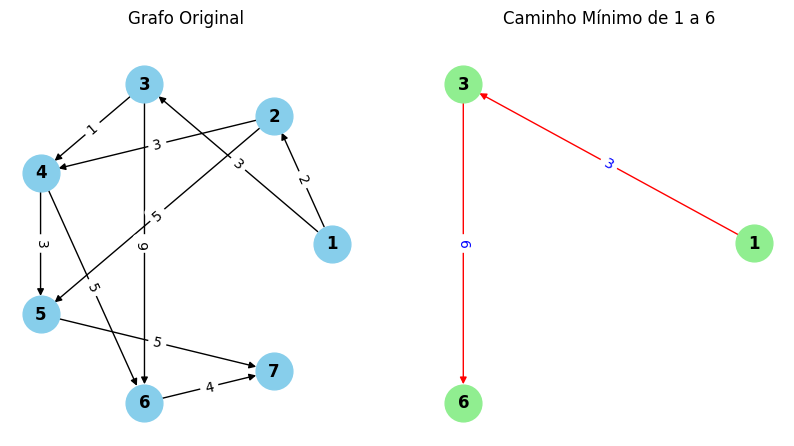

In [21]:
# Função para plotar as matrizes Pc e pai
def plot_matrizes(Pc, pai, title):
    labels = [f'v{i}' for i in range(1, len(Pc)+1)]

    # Plotar matriz Pc
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(Pc, cmap='viridis', interpolation='nearest')
    for i in range(Pc.shape[0]):
        for j in range(Pc.shape[1]):
            plt.text(j, i, Pc[i, j], ha='center', va='center', color='black')
    plt.colorbar()
    plt.xticks(np.arange(len(labels)), labels)
    plt.yticks(np.arange(len(labels)), labels)
    plt.xlabel('Destino')
    plt.ylabel('Origem')
    plt.title(f'Matriz Pc - {title}')

    # Plotar matriz pai
    plt.subplot(1, 2, 2)
    plt.imshow(pai, cmap='viridis', interpolation='nearest')
    for i in range(pai.shape[0]):
        for j in range(pai.shape[1]):
            if pai[i, j] != 0:
                plt.text(j, i, pai[i, j], ha='center', va='center', color='black')
            else:
                plt.text(j, i, 'NULL', ha='center', va='center', color='black')
    plt.colorbar()
    plt.xticks(np.arange(len(labels)), labels)
    plt.yticks(np.arange(len(labels)), labels)
    plt.xlabel('Destino')
    plt.ylabel('Origem')
    plt.title(f'Matriz pai - {title}')

    plt.tight_layout()
    plt.show()


# Algoritmo de Dijkstra para encontrar o caminho mínimo de um vértice a outro
def Dijkstra(G, source, target):
    dist = {node: float('inf') for node in G.nodes()}
    dist[source] = 0
    visited = set()
    parent = {node: None for node in G.nodes()}

    while len(visited) < len(G.nodes()):
        current_node = min((node for node in G.nodes() if node not in visited), key=lambda x: dist[x])
        visited.add(current_node)

        for neighbor, weight in G[current_node].items():
            if dist[current_node] + weight['weight'] < dist[neighbor]:
                dist[neighbor] = dist[current_node] + weight['weight']
                parent[neighbor] = current_node

    # Criar o caminho mínimo
    path = [target]
    while path[-1] != source:
        path.append(parent[path[-1]])
    path.reverse()

    return path, dist

# Escolha dos vértices de origem e destino
source = 1
target = 6

# Encontrar o caminho mínimo
path, dist = Dijkstra(G, source, target)

# Criar um grafo com o caminho mínimo encontrado
G_path = G.subgraph(path)

# Plotar o grafo original e o caminho mínimo
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
pos = nx.circular_layout(G)
nx.draw(G, pos, with_labels=True, node_size=700, node_color='skyblue', font_size=12, font_weight='bold')
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): G[u][v]['weight'] for u, v in G.edges()}, font_color='black')
plt.title('Grafo Original', pad=20)

plt.subplot(1, 2, 2)
pos_path = nx.circular_layout(G_path)
nx.draw(G_path, pos_path, with_labels=True, node_size=700, node_color='lightgreen', font_size=12, font_weight='bold', edge_color='red')
nx.draw_networkx_edge_labels(G_path, pos_path, edge_labels={(u, v): G_path[u][v]['weight'] for u, v in G_path.edges()}, font_color='blue')
plt.title(f'Caminho Mínimo de {source} a {target}', pad=20)

# Matrizes Pc e pai
Pc = np.zeros((len(G), len(G)))
pai = np.zeros((len(G), len(G)))

dist, path = nx.single_source_dijkstra(G, source=source)

for i, node in enumerate(G.nodes()):
    for j, dist_val in dist.items():
        if node != j:
            Pc[i, j-1] = dist_val
            if j in path[node]:
                pai[i, j-1] = path[node][j]

# Plotar as matrizes Pc e pai
plot_matrizes(Pc, pai, f'Caminho Mínimo de {source} a {target}')

plt.tight_layout()
plt.show()

IndexError: list index out of range

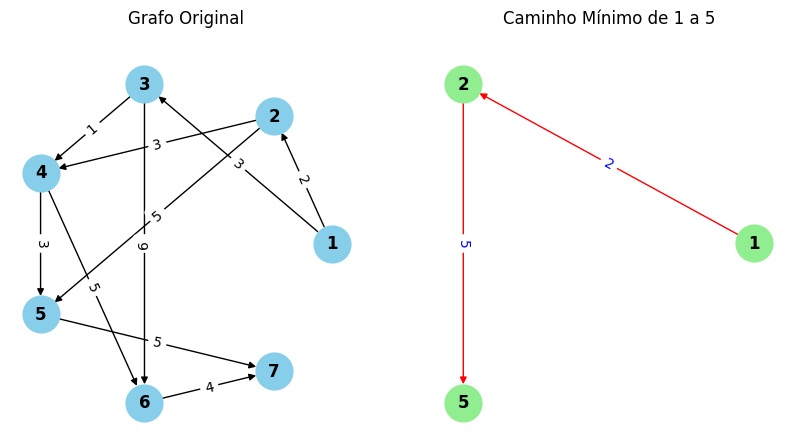

In [22]:
# Função para plotar as matrizes Pc e pai
def plot_matrizes(Pc, pai, title):
    labels = [f'v{i}' for i in range(1, len(Pc)+1)]

    # Plotar matriz Pc
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(Pc, cmap='viridis', interpolation='nearest')
    for i in range(Pc.shape[0]):
        for j in range(Pc.shape[1]):
            plt.text(j, i, Pc[i, j], ha='center', va='center', color='black')
    plt.colorbar()
    plt.xticks(np.arange(len(labels)), labels)
    plt.yticks(np.arange(len(labels)), labels)
    plt.xlabel('Destino')
    plt.ylabel('Origem')
    plt.title(f'Matriz Pc - {title}')

    # Plotar matriz pai
    plt.subplot(1, 2, 2)
    plt.imshow(pai, cmap='viridis', interpolation='nearest')
    for i in range(pai.shape[0]):
        for j in range(pai.shape[1]):
            if pai[i, j] != 0:
                plt.text(j, i, pai[i, j], ha='center', va='center', color='black')
            else:
                plt.text(j, i, 'NULL', ha='center', va='center', color='black')
    plt.colorbar()
    plt.xticks(np.arange(len(labels)), labels)
    plt.yticks(np.arange(len(labels)), labels)
    plt.xlabel('Destino')
    plt.ylabel('Origem')
    plt.title(f'Matriz pai - {title}')

    plt.tight_layout()
    plt.show()


# Algoritmo de Dijkstra para encontrar o caminho mínimo de um vértice a outro
def Dijkstra(G, source, target):
    dist = {node: float('inf') for node in G.nodes()}
    dist[source] = 0
    visited = set()
    parent = {node: None for node in G.nodes()}

    while len(visited) < len(G.nodes()):
        current_node = min((node for node in G.nodes() if node not in visited), key=lambda x: dist[x])
        visited.add(current_node)

        for neighbor, weight in G[current_node].items():
            if dist[current_node] + weight['weight'] < dist[neighbor]:
                dist[neighbor] = dist[current_node] + weight['weight']
                parent[neighbor] = current_node

    # Criar o caminho mínimo
    path = [target]
    while path[-1] != source:
        path.append(parent[path[-1]])
    path.reverse()

    return path, dist

# Escolha dos vértices de origem e destino
source = 1
target = 5

# Encontrar o caminho mínimo
path, dist = Dijkstra(G, source, target)

# Criar um grafo com o caminho mínimo encontrado
G_path = G.subgraph(path)

# Plotar o grafo original e o caminho mínimo
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
pos = nx.circular_layout(G)
nx.draw(G, pos, with_labels=True, node_size=700, node_color='skyblue', font_size=12, font_weight='bold')
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): G[u][v]['weight'] for u, v in G.edges()}, font_color='black')
plt.title('Grafo Original', pad=20)

plt.subplot(1, 2, 2)
pos_path = nx.circular_layout(G_path)
nx.draw(G_path, pos_path, with_labels=True, node_size=700, node_color='lightgreen', font_size=12, font_weight='bold', edge_color='red')
nx.draw_networkx_edge_labels(G_path, pos_path, edge_labels={(u, v): G_path[u][v]['weight'] for u, v in G_path.edges()}, font_color='blue')
plt.title(f'Caminho Mínimo de {source} a {target}', pad=20)

# Matrizes Pc e pai
Pc = np.zeros((len(G), len(G)))
pai = np.zeros((len(G), len(G)))

dist, path = nx.single_source_dijkstra(G, source=source)

for i, node in enumerate(G.nodes()):
    for j, dist_val in dist.items():
        if node != j:
            Pc[i, j-1] = dist_val
            if j in path[node]:
                pai[i, j-1] = path[node][j]

# Plotar as matrizes Pc e pai
plot_matrizes(Pc, pai, f'Caminho Mínimo de {source} a {target}')

plt.tight_layout()
plt.show()

IndexError: list index out of range

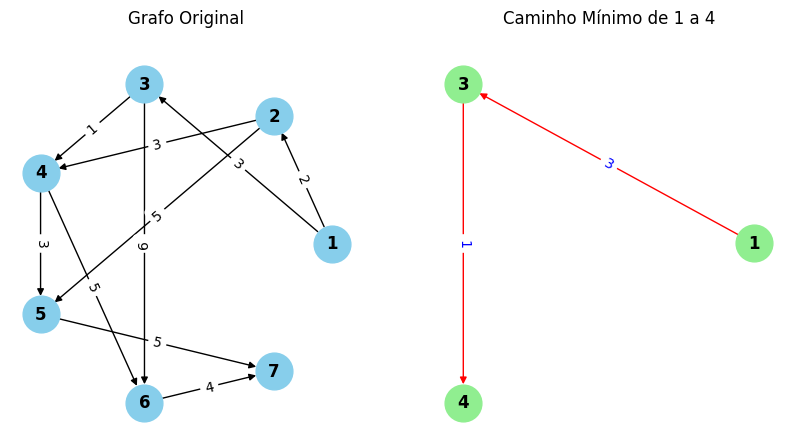

In [23]:
# Função para plotar as matrizes Pc e pai
def plot_matrizes(Pc, pai, title):
    labels = [f'v{i}' for i in range(1, len(Pc)+1)]

    # Plotar matriz Pc
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(Pc, cmap='viridis', interpolation='nearest')
    for i in range(Pc.shape[0]):
        for j in range(Pc.shape[1]):
            plt.text(j, i, Pc[i, j], ha='center', va='center', color='black')
    plt.colorbar()
    plt.xticks(np.arange(len(labels)), labels)
    plt.yticks(np.arange(len(labels)), labels)
    plt.xlabel('Destino')
    plt.ylabel('Origem')
    plt.title(f'Matriz Pc - {title}')

    # Plotar matriz pai
    plt.subplot(1, 2, 2)
    plt.imshow(pai, cmap='viridis', interpolation='nearest')
    for i in range(pai.shape[0]):
        for j in range(pai.shape[1]):
            if pai[i, j] != 0:
                plt.text(j, i, pai[i, j], ha='center', va='center', color='black')
            else:
                plt.text(j, i, 'NULL', ha='center', va='center', color='black')
    plt.colorbar()
    plt.xticks(np.arange(len(labels)), labels)
    plt.yticks(np.arange(len(labels)), labels)
    plt.xlabel('Destino')
    plt.ylabel('Origem')
    plt.title(f'Matriz pai - {title}')

    plt.tight_layout()
    plt.show()


# Algoritmo de Dijkstra para encontrar o caminho mínimo de um vértice a outro
def Dijkstra(G, source, target):
    dist = {node: float('inf') for node in G.nodes()}
    dist[source] = 0
    visited = set()
    parent = {node: None for node in G.nodes()}

    while len(visited) < len(G.nodes()):
        current_node = min((node for node in G.nodes() if node not in visited), key=lambda x: dist[x])
        visited.add(current_node)

        for neighbor, weight in G[current_node].items():
            if dist[current_node] + weight['weight'] < dist[neighbor]:
                dist[neighbor] = dist[current_node] + weight['weight']
                parent[neighbor] = current_node

    # Criar o caminho mínimo
    path = [target]
    while path[-1] != source:
        path.append(parent[path[-1]])
    path.reverse()

    return path, dist

# Escolha dos vértices de origem e destino
source = 1
target = 4

# Encontrar o caminho mínimo
path, dist = Dijkstra(G, source, target)

# Criar um grafo com o caminho mínimo encontrado
G_path = G.subgraph(path)

# Plotar o grafo original e o caminho mínimo
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
pos = nx.circular_layout(G)
nx.draw(G, pos, with_labels=True, node_size=700, node_color='skyblue', font_size=12, font_weight='bold')
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): G[u][v]['weight'] for u, v in G.edges()}, font_color='black')
plt.title('Grafo Original', pad=20)

plt.subplot(1, 2, 2)
pos_path = nx.circular_layout(G_path)
nx.draw(G_path, pos_path, with_labels=True, node_size=700, node_color='lightgreen', font_size=12, font_weight='bold', edge_color='red')
nx.draw_networkx_edge_labels(G_path, pos_path, edge_labels={(u, v): G_path[u][v]['weight'] for u, v in G_path.edges()}, font_color='blue')
plt.title(f'Caminho Mínimo de {source} a {target}', pad=20)

# Matrizes Pc e pai
Pc = np.zeros((len(G), len(G)))
pai = np.zeros((len(G), len(G)))

dist, path = nx.single_source_dijkstra(G, source=source)

for i, node in enumerate(G.nodes()):
    for j, dist_val in dist.items():
        if node != j:
            Pc[i, j-1] = dist_val
            if j in path[node]:
                pai[i, j-1] = path[node][j]

# Plotar as matrizes Pc e pai
plot_matrizes(Pc, pai, f'Caminho Mínimo de {source} a {target}')

plt.tight_layout()
plt.show()

IndexError: list index out of range

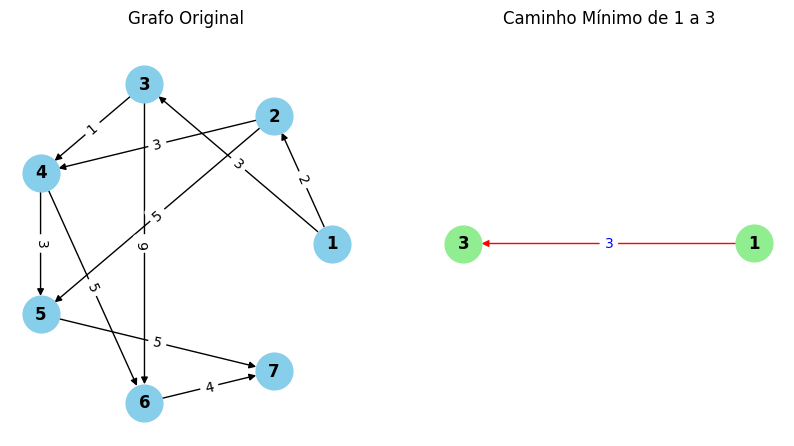

In [24]:
# Função para plotar as matrizes Pc e pai
def plot_matrizes(Pc, pai, title):
    labels = [f'v{i}' for i in range(1, len(Pc)+1)]

    # Plotar matriz Pc
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(Pc, cmap='viridis', interpolation='nearest')
    for i in range(Pc.shape[0]):
        for j in range(Pc.shape[1]):
            plt.text(j, i, Pc[i, j], ha='center', va='center', color='black')
    plt.colorbar()
    plt.xticks(np.arange(len(labels)), labels)
    plt.yticks(np.arange(len(labels)), labels)
    plt.xlabel('Destino')
    plt.ylabel('Origem')
    plt.title(f'Matriz Pc - {title}')

    # Plotar matriz pai
    plt.subplot(1, 2, 2)
    plt.imshow(pai, cmap='viridis', interpolation='nearest')
    for i in range(pai.shape[0]):
        for j in range(pai.shape[1]):
            if pai[i, j] != 0:
                plt.text(j, i, pai[i, j], ha='center', va='center', color='black')
            else:
                plt.text(j, i, 'NULL', ha='center', va='center', color='black')
    plt.colorbar()
    plt.xticks(np.arange(len(labels)), labels)
    plt.yticks(np.arange(len(labels)), labels)
    plt.xlabel('Destino')
    plt.ylabel('Origem')
    plt.title(f'Matriz pai - {title}')

    plt.tight_layout()
    plt.show()


# Algoritmo de Dijkstra para encontrar o caminho mínimo de um vértice a outro
def Dijkstra(G, source, target):
    dist = {node: float('inf') for node in G.nodes()}
    dist[source] = 0
    visited = set()
    parent = {node: None for node in G.nodes()}

    while len(visited) < len(G.nodes()):
        current_node = min((node for node in G.nodes() if node not in visited), key=lambda x: dist[x])
        visited.add(current_node)

        for neighbor, weight in G[current_node].items():
            if dist[current_node] + weight['weight'] < dist[neighbor]:
                dist[neighbor] = dist[current_node] + weight['weight']
                parent[neighbor] = current_node

    # Criar o caminho mínimo
    path = [target]
    while path[-1] != source:
        path.append(parent[path[-1]])
    path.reverse()

    return path, dist

# Escolha dos vértices de origem e destino
source = 1
target = 3

# Encontrar o caminho mínimo
path, dist = Dijkstra(G, source, target)

# Criar um grafo com o caminho mínimo encontrado
G_path = G.subgraph(path)

# Plotar o grafo original e o caminho mínimo
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
pos = nx.circular_layout(G)
nx.draw(G, pos, with_labels=True, node_size=700, node_color='skyblue', font_size=12, font_weight='bold')
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): G[u][v]['weight'] for u, v in G.edges()}, font_color='black')
plt.title('Grafo Original', pad=20)

plt.subplot(1, 2, 2)
pos_path = nx.circular_layout(G_path)
nx.draw(G_path, pos_path, with_labels=True, node_size=700, node_color='lightgreen', font_size=12, font_weight='bold', edge_color='red')
nx.draw_networkx_edge_labels(G_path, pos_path, edge_labels={(u, v): G_path[u][v]['weight'] for u, v in G_path.edges()}, font_color='blue')
plt.title(f'Caminho Mínimo de {source} a {target}', pad=20)

# Matrizes Pc e pai
Pc = np.zeros((len(G), len(G)))
pai = np.zeros((len(G), len(G)))

dist, path = nx.single_source_dijkstra(G, source=source)

for i, node in enumerate(G.nodes()):
    for j, dist_val in dist.items():
        if node != j:
            Pc[i, j-1] = dist_val
            if j in path[node]:
                pai[i, j-1] = path[node][j]

# Plotar as matrizes Pc e pai
plot_matrizes(Pc, pai, f'Caminho Mínimo de {source} a {target}')

plt.tight_layout()
plt.show()

IndexError: list index out of range

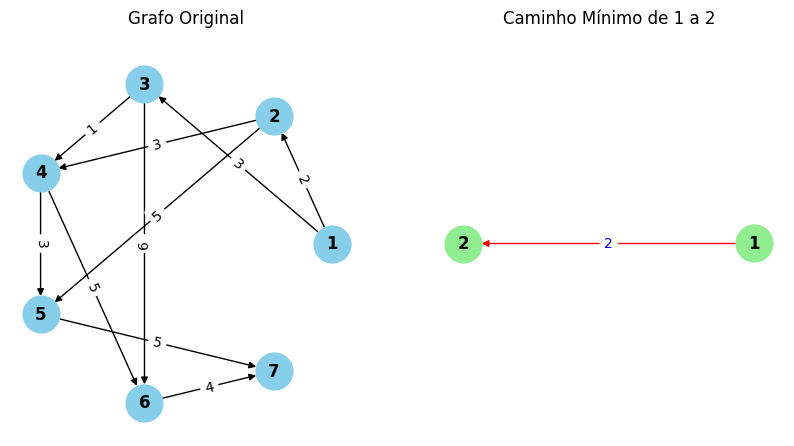

In [25]:
# Função para plotar as matrizes Pc e pai
def plot_matrizes(Pc, pai, title):
    labels = [f'v{i}' for i in range(1, len(Pc)+1)]

    # Plotar matriz Pc
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(Pc, cmap='viridis', interpolation='nearest')
    for i in range(Pc.shape[0]):
        for j in range(Pc.shape[1]):
            plt.text(j, i, Pc[i, j], ha='center', va='center', color='black')
    plt.colorbar()
    plt.xticks(np.arange(len(labels)), labels)
    plt.yticks(np.arange(len(labels)), labels)
    plt.xlabel('Destino')
    plt.ylabel('Origem')
    plt.title(f'Matriz Pc - {title}')

    # Plotar matriz pai
    plt.subplot(1, 2, 2)
    plt.imshow(pai, cmap='viridis', interpolation='nearest')
    for i in range(pai.shape[0]):
        for j in range(pai.shape[1]):
            if pai[i, j] != 0:
                plt.text(j, i, pai[i, j], ha='center', va='center', color='black')
            else:
                plt.text(j, i, 'NULL', ha='center', va='center', color='black')
    plt.colorbar()
    plt.xticks(np.arange(len(labels)), labels)
    plt.yticks(np.arange(len(labels)), labels)
    plt.xlabel('Destino')
    plt.ylabel('Origem')
    plt.title(f'Matriz pai - {title}')

    plt.tight_layout()
    plt.show()


# Algoritmo de Dijkstra para encontrar o caminho mínimo de um vértice a outro
def Dijkstra(G, source, target):
    dist = {node: float('inf') for node in G.nodes()}
    dist[source] = 0
    visited = set()
    parent = {node: None for node in G.nodes()}

    while len(visited) < len(G.nodes()):
        current_node = min((node for node in G.nodes() if node not in visited), key=lambda x: dist[x])
        visited.add(current_node)

        for neighbor, weight in G[current_node].items():
            if dist[current_node] + weight['weight'] < dist[neighbor]:
                dist[neighbor] = dist[current_node] + weight['weight']
                parent[neighbor] = current_node

    # Criar o caminho mínimo
    path = [target]
    while path[-1] != source:
        path.append(parent[path[-1]])
    path.reverse()

    return path, dist

# Escolha dos vértices de origem e destino
source = 1
target = 2

# Encontrar o caminho mínimo
path, dist = Dijkstra(G, source, target)

# Criar um grafo com o caminho mínimo encontrado
G_path = G.subgraph(path)

# Plotar o grafo original e o caminho mínimo
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
pos = nx.circular_layout(G)
nx.draw(G, pos, with_labels=True, node_size=700, node_color='skyblue', font_size=12, font_weight='bold')
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): G[u][v]['weight'] for u, v in G.edges()}, font_color='black')
plt.title('Grafo Original', pad=20)

plt.subplot(1, 2, 2)
pos_path = nx.circular_layout(G_path)
nx.draw(G_path, pos_path, with_labels=True, node_size=700, node_color='lightgreen', font_size=12, font_weight='bold', edge_color='red')
nx.draw_networkx_edge_labels(G_path, pos_path, edge_labels={(u, v): G_path[u][v]['weight'] for u, v in G_path.edges()}, font_color='blue')
plt.title(f'Caminho Mínimo de {source} a {target}', pad=20)

# Matrizes Pc e pai
Pc = np.zeros((len(G), len(G)))
pai = np.zeros((len(G), len(G)))

dist, path = nx.single_source_dijkstra(G, source=source)

for i, node in enumerate(G.nodes()):
    for j, dist_val in dist.items():
        if node != j:
            Pc[i, j-1] = dist_val
            if j in path[node]:
                pai[i, j-1] = path[node][j]

# Plotar as matrizes Pc e pai
plot_matrizes(Pc, pai, f'Caminho Mínimo de {source} a {target}')

plt.tight_layout()
plt.show()

KeyError: 1

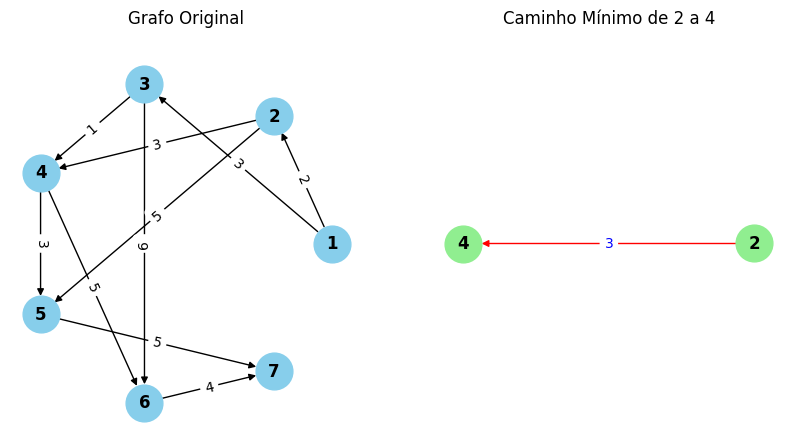

In [29]:
# Função para plotar as matrizes Pc e pai
def plot_matrizes(Pc, pai, title):
    labels = [f'v{i}' for i in range(1, len(Pc)+1)]

    # Plotar matriz Pc
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(Pc, cmap='viridis', interpolation='nearest')
    for i in range(Pc.shape[0]):
        for j in range(Pc.shape[1]):
            plt.text(j, i, Pc[i, j], ha='center', va='center', color='black')
    plt.colorbar()
    plt.xticks(np.arange(len(labels)), labels)
    plt.yticks(np.arange(len(labels)), labels)
    plt.xlabel('Destino')
    plt.ylabel('Origem')
    plt.title(f'Matriz Pc - {title}')

    # Plotar matriz pai
    plt.subplot(1, 2, 2)
    plt.imshow(pai, cmap='viridis', interpolation='nearest')
    for i in range(pai.shape[0]):
        for j in range(pai.shape[1]):
            if pai[i, j] != 0:
                plt.text(j, i, pai[i, j], ha='center', va='center', color='black')
            else:
                plt.text(j, i, 'NULL', ha='center', va='center', color='black')
    plt.colorbar()
    plt.xticks(np.arange(len(labels)), labels)
    plt.yticks(np.arange(len(labels)), labels)
    plt.xlabel('Destino')
    plt.ylabel('Origem')
    plt.title(f'Matriz pai - {title}')

    plt.tight_layout()
    plt.show()


# Algoritmo de Dijkstra para encontrar o caminho mínimo de um vértice a outro
def Dijkstra(G, source, target):
    dist = {node: float('inf') for node in G.nodes()}
    dist[source] = 0
    visited = set()
    parent = {node: None for node in G.nodes()}

    while len(visited) < len(G.nodes()):
        current_node = min((node for node in G.nodes() if node not in visited), key=lambda x: dist[x])
        visited.add(current_node)

        for neighbor, weight in G[current_node].items():
            if dist[current_node] + weight['weight'] < dist[neighbor]:
                dist[neighbor] = dist[current_node] + weight['weight']
                parent[neighbor] = current_node

    # Criar o caminho mínimo
    path = [target]
    while path[-1] != source:
        path.append(parent[path[-1]])
    path.reverse()

    return path, dist

# Escolha dos vértices de origem e destino
source = 2
target = 4

# Encontrar o caminho mínimo
path, dist = Dijkstra(G, source, target)

# Criar um grafo com o caminho mínimo encontrado
G_path = G.subgraph(path)

# Plotar o grafo original e o caminho mínimo
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
pos = nx.circular_layout(G)
nx.draw(G, pos, with_labels=True, node_size=700, node_color='skyblue', font_size=12, font_weight='bold')
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): G[u][v]['weight'] for u, v in G.edges()}, font_color='black')
plt.title('Grafo Original', pad=20)

plt.subplot(1, 2, 2)
pos_path = nx.circular_layout(G_path)
nx.draw(G_path, pos_path, with_labels=True, node_size=700, node_color='lightgreen', font_size=12, font_weight='bold', edge_color='red')
nx.draw_networkx_edge_labels(G_path, pos_path, edge_labels={(u, v): G_path[u][v]['weight'] for u, v in G_path.edges()}, font_color='blue')
plt.title(f'Caminho Mínimo de {source} a {target}', pad=20)

# Matrizes Pc e pai
Pc = np.zeros((len(G), len(G)))
pai = np.zeros((len(G), len(G)))

dist, path = nx.single_source_dijkstra(G, source=source)

for i, node in enumerate(G.nodes()):
    for j, dist_val in dist.items():
        if node != j:
            Pc[i, j-1] = dist_val
            if j in path[node]:
                pai[i, j-1] = path[node][j]

# Plotar as matrizes Pc e pai
plot_matrizes(Pc, pai, f'Caminho Mínimo de {source} a {target}')

plt.tight_layout()
plt.show()

KeyError: 1

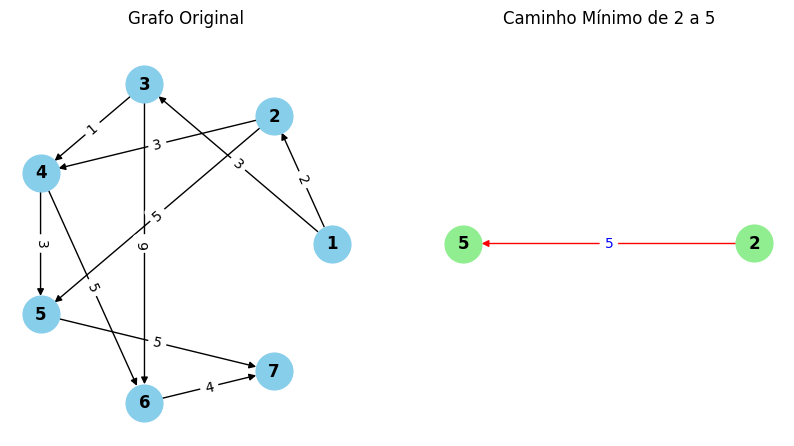

In [30]:
# Função para plotar as matrizes Pc e pai
def plot_matrizes(Pc, pai, title):
    labels = [f'v{i}' for i in range(1, len(Pc)+1)]

    # Plotar matriz Pc
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(Pc, cmap='viridis', interpolation='nearest')
    for i in range(Pc.shape[0]):
        for j in range(Pc.shape[1]):
            plt.text(j, i, Pc[i, j], ha='center', va='center', color='black')
    plt.colorbar()
    plt.xticks(np.arange(len(labels)), labels)
    plt.yticks(np.arange(len(labels)), labels)
    plt.xlabel('Destino')
    plt.ylabel('Origem')
    plt.title(f'Matriz Pc - {title}')

    # Plotar matriz pai
    plt.subplot(1, 2, 2)
    plt.imshow(pai, cmap='viridis', interpolation='nearest')
    for i in range(pai.shape[0]):
        for j in range(pai.shape[1]):
            if pai[i, j] != 0:
                plt.text(j, i, pai[i, j], ha='center', va='center', color='black')
            else:
                plt.text(j, i, 'NULL', ha='center', va='center', color='black')
    plt.colorbar()
    plt.xticks(np.arange(len(labels)), labels)
    plt.yticks(np.arange(len(labels)), labels)
    plt.xlabel('Destino')
    plt.ylabel('Origem')
    plt.title(f'Matriz pai - {title}')

    plt.tight_layout()
    plt.show()


# Algoritmo de Dijkstra para encontrar o caminho mínimo de um vértice a outro
def Dijkstra(G, source, target):
    dist = {node: float('inf') for node in G.nodes()}
    dist[source] = 0
    visited = set()
    parent = {node: None for node in G.nodes()}

    while len(visited) < len(G.nodes()):
        current_node = min((node for node in G.nodes() if node not in visited), key=lambda x: dist[x])
        visited.add(current_node)

        for neighbor, weight in G[current_node].items():
            if dist[current_node] + weight['weight'] < dist[neighbor]:
                dist[neighbor] = dist[current_node] + weight['weight']
                parent[neighbor] = current_node

    # Criar o caminho mínimo
    path = [target]
    while path[-1] != source:
        path.append(parent[path[-1]])
    path.reverse()

    return path, dist

# Escolha dos vértices de origem e destino
source = 2
target = 5

# Encontrar o caminho mínimo
path, dist = Dijkstra(G, source, target)

# Criar um grafo com o caminho mínimo encontrado
G_path = G.subgraph(path)

# Plotar o grafo original e o caminho mínimo
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
pos = nx.circular_layout(G)
nx.draw(G, pos, with_labels=True, node_size=700, node_color='skyblue', font_size=12, font_weight='bold')
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): G[u][v]['weight'] for u, v in G.edges()}, font_color='black')
plt.title('Grafo Original', pad=20)

plt.subplot(1, 2, 2)
pos_path = nx.circular_layout(G_path)
nx.draw(G_path, pos_path, with_labels=True, node_size=700, node_color='lightgreen', font_size=12, font_weight='bold', edge_color='red')
nx.draw_networkx_edge_labels(G_path, pos_path, edge_labels={(u, v): G_path[u][v]['weight'] for u, v in G_path.edges()}, font_color='blue')
plt.title(f'Caminho Mínimo de {source} a {target}', pad=20)

# Matrizes Pc e pai
Pc = np.zeros((len(G), len(G)))
pai = np.zeros((len(G), len(G)))

dist, path = nx.single_source_dijkstra(G, source=source)

for i, node in enumerate(G.nodes()):
    for j, dist_val in dist.items():
        if node != j:
            Pc[i, j-1] = dist_val
            if j in path[node]:
                pai[i, j-1] = path[node][j]

# Plotar as matrizes Pc e pai
plot_matrizes(Pc, pai, f'Caminho Mínimo de {source} a {target}')

plt.tight_layout()
plt.show()

KeyError: 1

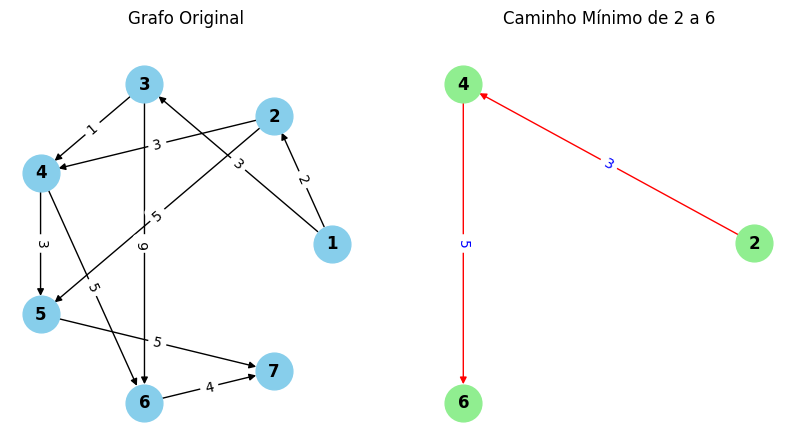

In [31]:
# Função para plotar as matrizes Pc e pai
def plot_matrizes(Pc, pai, title):
    labels = [f'v{i}' for i in range(1, len(Pc)+1)]

    # Plotar matriz Pc
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(Pc, cmap='viridis', interpolation='nearest')
    for i in range(Pc.shape[0]):
        for j in range(Pc.shape[1]):
            plt.text(j, i, Pc[i, j], ha='center', va='center', color='black')
    plt.colorbar()
    plt.xticks(np.arange(len(labels)), labels)
    plt.yticks(np.arange(len(labels)), labels)
    plt.xlabel('Destino')
    plt.ylabel('Origem')
    plt.title(f'Matriz Pc - {title}')

    # Plotar matriz pai
    plt.subplot(1, 2, 2)
    plt.imshow(pai, cmap='viridis', interpolation='nearest')
    for i in range(pai.shape[0]):
        for j in range(pai.shape[1]):
            if pai[i, j] != 0:
                plt.text(j, i, pai[i, j], ha='center', va='center', color='black')
            else:
                plt.text(j, i, 'NULL', ha='center', va='center', color='black')
    plt.colorbar()
    plt.xticks(np.arange(len(labels)), labels)
    plt.yticks(np.arange(len(labels)), labels)
    plt.xlabel('Destino')
    plt.ylabel('Origem')
    plt.title(f'Matriz pai - {title}')

    plt.tight_layout()
    plt.show()


# Algoritmo de Dijkstra para encontrar o caminho mínimo de um vértice a outro
def Dijkstra(G, source, target):
    dist = {node: float('inf') for node in G.nodes()}
    dist[source] = 0
    visited = set()
    parent = {node: None for node in G.nodes()}

    while len(visited) < len(G.nodes()):
        current_node = min((node for node in G.nodes() if node not in visited), key=lambda x: dist[x])
        visited.add(current_node)

        for neighbor, weight in G[current_node].items():
            if dist[current_node] + weight['weight'] < dist[neighbor]:
                dist[neighbor] = dist[current_node] + weight['weight']
                parent[neighbor] = current_node

    # Criar o caminho mínimo
    path = [target]
    while path[-1] != source:
        path.append(parent[path[-1]])
    path.reverse()

    return path, dist

# Escolha dos vértices de origem e destino
source = 2
target = 6

# Encontrar o caminho mínimo
path, dist = Dijkstra(G, source, target)

# Criar um grafo com o caminho mínimo encontrado
G_path = G.subgraph(path)

# Plotar o grafo original e o caminho mínimo
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
pos = nx.circular_layout(G)
nx.draw(G, pos, with_labels=True, node_size=700, node_color='skyblue', font_size=12, font_weight='bold')
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): G[u][v]['weight'] for u, v in G.edges()}, font_color='black')
plt.title('Grafo Original', pad=20)

plt.subplot(1, 2, 2)
pos_path = nx.circular_layout(G_path)
nx.draw(G_path, pos_path, with_labels=True, node_size=700, node_color='lightgreen', font_size=12, font_weight='bold', edge_color='red')
nx.draw_networkx_edge_labels(G_path, pos_path, edge_labels={(u, v): G_path[u][v]['weight'] for u, v in G_path.edges()}, font_color='blue')
plt.title(f'Caminho Mínimo de {source} a {target}', pad=20)

# Matrizes Pc e pai
Pc = np.zeros((len(G), len(G)))
pai = np.zeros((len(G), len(G)))

dist, path = nx.single_source_dijkstra(G, source=source)

for i, node in enumerate(G.nodes()):
    for j, dist_val in dist.items():
        if node != j:
            Pc[i, j-1] = dist_val
            if j in path[node]:
                pai[i, j-1] = path[node][j]

# Plotar as matrizes Pc e pai
plot_matrizes(Pc, pai, f'Caminho Mínimo de {source} a {target}')

plt.tight_layout()
plt.show()

KeyError: 1

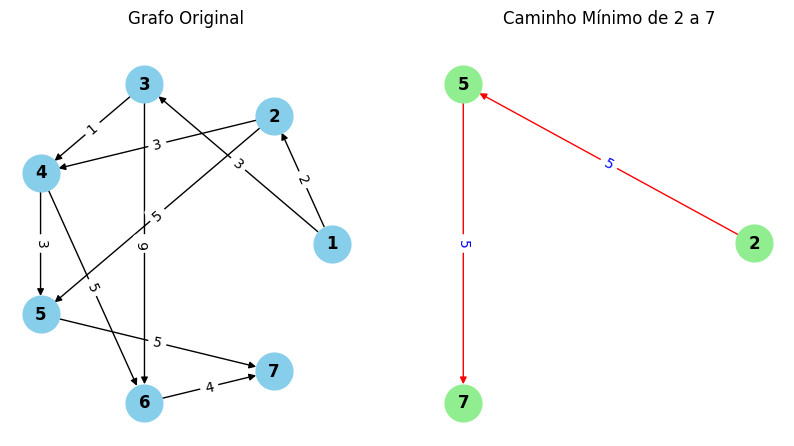

In [32]:
# Função para plotar as matrizes Pc e pai
def plot_matrizes(Pc, pai, title):
    labels = [f'v{i}' for i in range(1, len(Pc)+1)]

    # Plotar matriz Pc
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(Pc, cmap='viridis', interpolation='nearest')
    for i in range(Pc.shape[0]):
        for j in range(Pc.shape[1]):
            plt.text(j, i, Pc[i, j], ha='center', va='center', color='black')
    plt.colorbar()
    plt.xticks(np.arange(len(labels)), labels)
    plt.yticks(np.arange(len(labels)), labels)
    plt.xlabel('Destino')
    plt.ylabel('Origem')
    plt.title(f'Matriz Pc - {title}')

    # Plotar matriz pai
    plt.subplot(1, 2, 2)
    plt.imshow(pai, cmap='viridis', interpolation='nearest')
    for i in range(pai.shape[0]):
        for j in range(pai.shape[1]):
            if pai[i, j] != 0:
                plt.text(j, i, pai[i, j], ha='center', va='center', color='black')
            else:
                plt.text(j, i, 'NULL', ha='center', va='center', color='black')
    plt.colorbar()
    plt.xticks(np.arange(len(labels)), labels)
    plt.yticks(np.arange(len(labels)), labels)
    plt.xlabel('Destino')
    plt.ylabel('Origem')
    plt.title(f'Matriz pai - {title}')

    plt.tight_layout()
    plt.show()


# Algoritmo de Dijkstra para encontrar o caminho mínimo de um vértice a outro
def Dijkstra(G, source, target):
    dist = {node: float('inf') for node in G.nodes()}
    dist[source] = 0
    visited = set()
    parent = {node: None for node in G.nodes()}

    while len(visited) < len(G.nodes()):
        current_node = min((node for node in G.nodes() if node not in visited), key=lambda x: dist[x])
        visited.add(current_node)

        for neighbor, weight in G[current_node].items():
            if dist[current_node] + weight['weight'] < dist[neighbor]:
                dist[neighbor] = dist[current_node] + weight['weight']
                parent[neighbor] = current_node

    # Criar o caminho mínimo
    path = [target]
    while path[-1] != source:
        path.append(parent[path[-1]])
    path.reverse()

    return path, dist

# Escolha dos vértices de origem e destino
source = 2
target = 7

# Encontrar o caminho mínimo
path, dist = Dijkstra(G, source, target)

# Criar um grafo com o caminho mínimo encontrado
G_path = G.subgraph(path)

# Plotar o grafo original e o caminho mínimo
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
pos = nx.circular_layout(G)
nx.draw(G, pos, with_labels=True, node_size=700, node_color='skyblue', font_size=12, font_weight='bold')
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): G[u][v]['weight'] for u, v in G.edges()}, font_color='black')
plt.title('Grafo Original', pad=20)

plt.subplot(1, 2, 2)
pos_path = nx.circular_layout(G_path)
nx.draw(G_path, pos_path, with_labels=True, node_size=700, node_color='lightgreen', font_size=12, font_weight='bold', edge_color='red')
nx.draw_networkx_edge_labels(G_path, pos_path, edge_labels={(u, v): G_path[u][v]['weight'] for u, v in G_path.edges()}, font_color='blue')
plt.title(f'Caminho Mínimo de {source} a {target}', pad=20)

# Matrizes Pc e pai
Pc = np.zeros((len(G), len(G)))
pai = np.zeros((len(G), len(G)))

dist, path = nx.single_source_dijkstra(G, source=source)

for i, node in enumerate(G.nodes()):
    for j, dist_val in dist.items():
        if node != j:
            Pc[i, j-1] = dist_val
            if j in path[node]:
                pai[i, j-1] = path[node][j]

# Plotar as matrizes Pc e pai
plot_matrizes(Pc, pai, f'Caminho Mínimo de {source} a {target}')

plt.tight_layout()
plt.show()

KeyError: 1

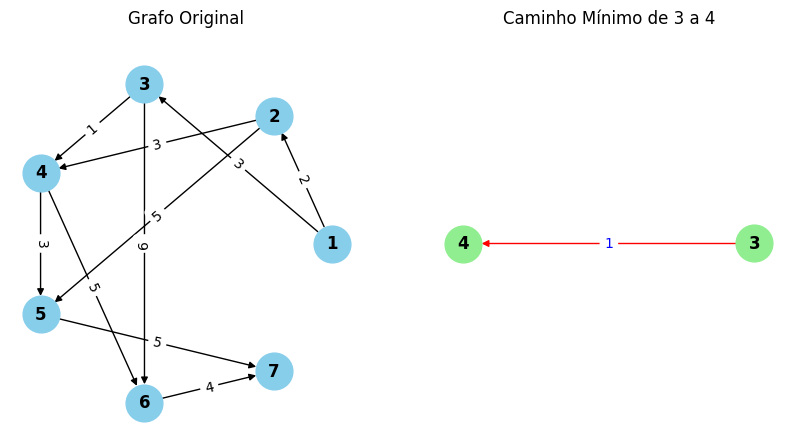

In [33]:
# Função para plotar as matrizes Pc e pai
def plot_matrizes(Pc, pai, title):
    labels = [f'v{i}' for i in range(1, len(Pc)+1)]

    # Plotar matriz Pc
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(Pc, cmap='viridis', interpolation='nearest')
    for i in range(Pc.shape[0]):
        for j in range(Pc.shape[1]):
            plt.text(j, i, Pc[i, j], ha='center', va='center', color='black')
    plt.colorbar()
    plt.xticks(np.arange(len(labels)), labels)
    plt.yticks(np.arange(len(labels)), labels)
    plt.xlabel('Destino')
    plt.ylabel('Origem')
    plt.title(f'Matriz Pc - {title}')

    # Plotar matriz pai
    plt.subplot(1, 2, 2)
    plt.imshow(pai, cmap='viridis', interpolation='nearest')
    for i in range(pai.shape[0]):
        for j in range(pai.shape[1]):
            if pai[i, j] != 0:
                plt.text(j, i, pai[i, j], ha='center', va='center', color='black')
            else:
                plt.text(j, i, 'NULL', ha='center', va='center', color='black')
    plt.colorbar()
    plt.xticks(np.arange(len(labels)), labels)
    plt.yticks(np.arange(len(labels)), labels)
    plt.xlabel('Destino')
    plt.ylabel('Origem')
    plt.title(f'Matriz pai - {title}')

    plt.tight_layout()
    plt.show()


# Algoritmo de Dijkstra para encontrar o caminho mínimo de um vértice a outro
def Dijkstra(G, source, target):
    dist = {node: float('inf') for node in G.nodes()}
    dist[source] = 0
    visited = set()
    parent = {node: None for node in G.nodes()}

    while len(visited) < len(G.nodes()):
        current_node = min((node for node in G.nodes() if node not in visited), key=lambda x: dist[x])
        visited.add(current_node)

        for neighbor, weight in G[current_node].items():
            if dist[current_node] + weight['weight'] < dist[neighbor]:
                dist[neighbor] = dist[current_node] + weight['weight']
                parent[neighbor] = current_node

    # Criar o caminho mínimo
    path = [target]
    while path[-1] != source:
        path.append(parent[path[-1]])
    path.reverse()

    return path, dist

# Escolha dos vértices de origem e destino
source = 3
target = 4

# Encontrar o caminho mínimo
path, dist = Dijkstra(G, source, target)

# Criar um grafo com o caminho mínimo encontrado
G_path = G.subgraph(path)

# Plotar o grafo original e o caminho mínimo
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
pos = nx.circular_layout(G)
nx.draw(G, pos, with_labels=True, node_size=700, node_color='skyblue', font_size=12, font_weight='bold')
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): G[u][v]['weight'] for u, v in G.edges()}, font_color='black')
plt.title('Grafo Original', pad=20)

plt.subplot(1, 2, 2)
pos_path = nx.circular_layout(G_path)
nx.draw(G_path, pos_path, with_labels=True, node_size=700, node_color='lightgreen', font_size=12, font_weight='bold', edge_color='red')
nx.draw_networkx_edge_labels(G_path, pos_path, edge_labels={(u, v): G_path[u][v]['weight'] for u, v in G_path.edges()}, font_color='blue')
plt.title(f'Caminho Mínimo de {source} a {target}', pad=20)

# Matrizes Pc e pai
Pc = np.zeros((len(G), len(G)))
pai = np.zeros((len(G), len(G)))

dist, path = nx.single_source_dijkstra(G, source=source)

for i, node in enumerate(G.nodes()):
    for j, dist_val in dist.items():
        if node != j:
            Pc[i, j-1] = dist_val
            if j in path[node]:
                pai[i, j-1] = path[node][j]

# Plotar as matrizes Pc e pai
plot_matrizes(Pc, pai, f'Caminho Mínimo de {source} a {target}')

plt.tight_layout()
plt.show()

KeyError: 1

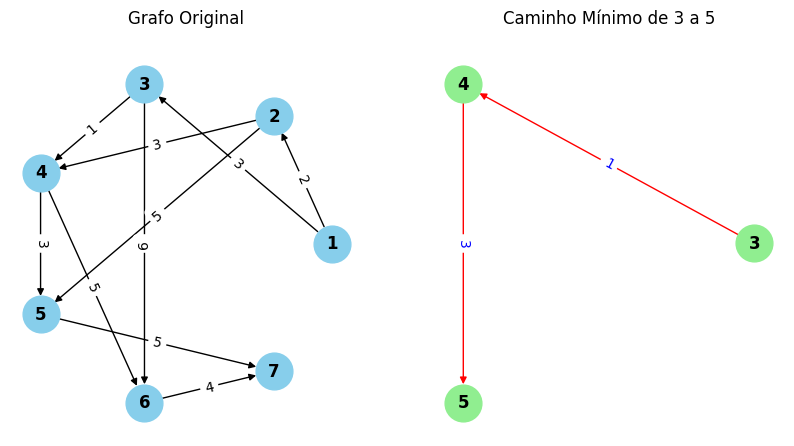

In [34]:
# Função para plotar as matrizes Pc e pai
def plot_matrizes(Pc, pai, title):
    labels = [f'v{i}' for i in range(1, len(Pc)+1)]

    # Plotar matriz Pc
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(Pc, cmap='viridis', interpolation='nearest')
    for i in range(Pc.shape[0]):
        for j in range(Pc.shape[1]):
            plt.text(j, i, Pc[i, j], ha='center', va='center', color='black')
    plt.colorbar()
    plt.xticks(np.arange(len(labels)), labels)
    plt.yticks(np.arange(len(labels)), labels)
    plt.xlabel('Destino')
    plt.ylabel('Origem')
    plt.title(f'Matriz Pc - {title}')

    # Plotar matriz pai
    plt.subplot(1, 2, 2)
    plt.imshow(pai, cmap='viridis', interpolation='nearest')
    for i in range(pai.shape[0]):
        for j in range(pai.shape[1]):
            if pai[i, j] != 0:
                plt.text(j, i, pai[i, j], ha='center', va='center', color='black')
            else:
                plt.text(j, i, 'NULL', ha='center', va='center', color='black')
    plt.colorbar()
    plt.xticks(np.arange(len(labels)), labels)
    plt.yticks(np.arange(len(labels)), labels)
    plt.xlabel('Destino')
    plt.ylabel('Origem')
    plt.title(f'Matriz pai - {title}')

    plt.tight_layout()
    plt.show()


# Algoritmo de Dijkstra para encontrar o caminho mínimo de um vértice a outro
def Dijkstra(G, source, target):
    dist = {node: float('inf') for node in G.nodes()}
    dist[source] = 0
    visited = set()
    parent = {node: None for node in G.nodes()}

    while len(visited) < len(G.nodes()):
        current_node = min((node for node in G.nodes() if node not in visited), key=lambda x: dist[x])
        visited.add(current_node)

        for neighbor, weight in G[current_node].items():
            if dist[current_node] + weight['weight'] < dist[neighbor]:
                dist[neighbor] = dist[current_node] + weight['weight']
                parent[neighbor] = current_node

    # Criar o caminho mínimo
    path = [target]
    while path[-1] != source:
        path.append(parent[path[-1]])
    path.reverse()

    return path, dist

# Escolha dos vértices de origem e destino
source = 3
target = 5

# Encontrar o caminho mínimo
path, dist = Dijkstra(G, source, target)

# Criar um grafo com o caminho mínimo encontrado
G_path = G.subgraph(path)

# Plotar o grafo original e o caminho mínimo
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
pos = nx.circular_layout(G)
nx.draw(G, pos, with_labels=True, node_size=700, node_color='skyblue', font_size=12, font_weight='bold')
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): G[u][v]['weight'] for u, v in G.edges()}, font_color='black')
plt.title('Grafo Original', pad=20)

plt.subplot(1, 2, 2)
pos_path = nx.circular_layout(G_path)
nx.draw(G_path, pos_path, with_labels=True, node_size=700, node_color='lightgreen', font_size=12, font_weight='bold', edge_color='red')
nx.draw_networkx_edge_labels(G_path, pos_path, edge_labels={(u, v): G_path[u][v]['weight'] for u, v in G_path.edges()}, font_color='blue')
plt.title(f'Caminho Mínimo de {source} a {target}', pad=20)

# Matrizes Pc e pai
Pc = np.zeros((len(G), len(G)))
pai = np.zeros((len(G), len(G)))

dist, path = nx.single_source_dijkstra(G, source=source)

for i, node in enumerate(G.nodes()):
    for j, dist_val in dist.items():
        if node != j:
            Pc[i, j-1] = dist_val
            if j in path[node]:
                pai[i, j-1] = path[node][j]

# Plotar as matrizes Pc e pai
plot_matrizes(Pc, pai, f'Caminho Mínimo de {source} a {target}')

plt.tight_layout()
plt.show()

KeyError: 1

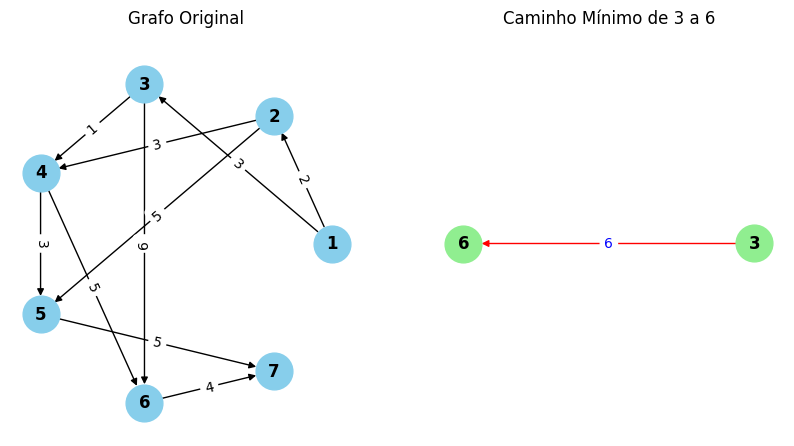

In [35]:
# Função para plotar as matrizes Pc e pai
def plot_matrizes(Pc, pai, title):
    labels = [f'v{i}' for i in range(1, len(Pc)+1)]

    # Plotar matriz Pc
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(Pc, cmap='viridis', interpolation='nearest')
    for i in range(Pc.shape[0]):
        for j in range(Pc.shape[1]):
            plt.text(j, i, Pc[i, j], ha='center', va='center', color='black')
    plt.colorbar()
    plt.xticks(np.arange(len(labels)), labels)
    plt.yticks(np.arange(len(labels)), labels)
    plt.xlabel('Destino')
    plt.ylabel('Origem')
    plt.title(f'Matriz Pc - {title}')

    # Plotar matriz pai
    plt.subplot(1, 2, 2)
    plt.imshow(pai, cmap='viridis', interpolation='nearest')
    for i in range(pai.shape[0]):
        for j in range(pai.shape[1]):
            if pai[i, j] != 0:
                plt.text(j, i, pai[i, j], ha='center', va='center', color='black')
            else:
                plt.text(j, i, 'NULL', ha='center', va='center', color='black')
    plt.colorbar()
    plt.xticks(np.arange(len(labels)), labels)
    plt.yticks(np.arange(len(labels)), labels)
    plt.xlabel('Destino')
    plt.ylabel('Origem')
    plt.title(f'Matriz pai - {title}')

    plt.tight_layout()
    plt.show()


# Algoritmo de Dijkstra para encontrar o caminho mínimo de um vértice a outro
def Dijkstra(G, source, target):
    dist = {node: float('inf') for node in G.nodes()}
    dist[source] = 0
    visited = set()
    parent = {node: None for node in G.nodes()}

    while len(visited) < len(G.nodes()):
        current_node = min((node for node in G.nodes() if node not in visited), key=lambda x: dist[x])
        visited.add(current_node)

        for neighbor, weight in G[current_node].items():
            if dist[current_node] + weight['weight'] < dist[neighbor]:
                dist[neighbor] = dist[current_node] + weight['weight']
                parent[neighbor] = current_node

    # Criar o caminho mínimo
    path = [target]
    while path[-1] != source:
        path.append(parent[path[-1]])
    path.reverse()

    return path, dist

# Escolha dos vértices de origem e destino
source = 3
target = 6

# Encontrar o caminho mínimo
path, dist = Dijkstra(G, source, target)

# Criar um grafo com o caminho mínimo encontrado
G_path = G.subgraph(path)

# Plotar o grafo original e o caminho mínimo
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
pos = nx.circular_layout(G)
nx.draw(G, pos, with_labels=True, node_size=700, node_color='skyblue', font_size=12, font_weight='bold')
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): G[u][v]['weight'] for u, v in G.edges()}, font_color='black')
plt.title('Grafo Original', pad=20)

plt.subplot(1, 2, 2)
pos_path = nx.circular_layout(G_path)
nx.draw(G_path, pos_path, with_labels=True, node_size=700, node_color='lightgreen', font_size=12, font_weight='bold', edge_color='red')
nx.draw_networkx_edge_labels(G_path, pos_path, edge_labels={(u, v): G_path[u][v]['weight'] for u, v in G_path.edges()}, font_color='blue')
plt.title(f'Caminho Mínimo de {source} a {target}', pad=20)

# Matrizes Pc e pai
Pc = np.zeros((len(G), len(G)))
pai = np.zeros((len(G), len(G)))

dist, path = nx.single_source_dijkstra(G, source=source)

for i, node in enumerate(G.nodes()):
    for j, dist_val in dist.items():
        if node != j:
            Pc[i, j-1] = dist_val
            if j in path[node]:
                pai[i, j-1] = path[node][j]

# Plotar as matrizes Pc e pai
plot_matrizes(Pc, pai, f'Caminho Mínimo de {source} a {target}')

plt.tight_layout()
plt.show()

KeyError: 1

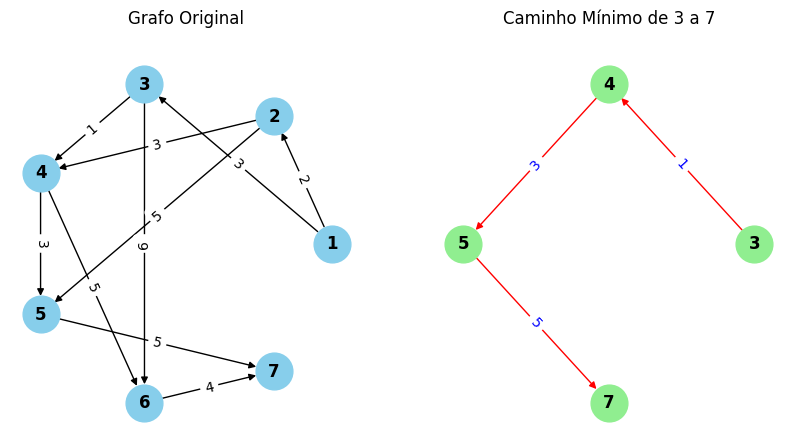

In [36]:
# Função para plotar as matrizes Pc e pai
def plot_matrizes(Pc, pai, title):
    labels = [f'v{i}' for i in range(1, len(Pc)+1)]

    # Plotar matriz Pc
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(Pc, cmap='viridis', interpolation='nearest')
    for i in range(Pc.shape[0]):
        for j in range(Pc.shape[1]):
            plt.text(j, i, Pc[i, j], ha='center', va='center', color='black')
    plt.colorbar()
    plt.xticks(np.arange(len(labels)), labels)
    plt.yticks(np.arange(len(labels)), labels)
    plt.xlabel('Destino')
    plt.ylabel('Origem')
    plt.title(f'Matriz Pc - {title}')

    # Plotar matriz pai
    plt.subplot(1, 2, 2)
    plt.imshow(pai, cmap='viridis', interpolation='nearest')
    for i in range(pai.shape[0]):
        for j in range(pai.shape[1]):
            if pai[i, j] != 0:
                plt.text(j, i, pai[i, j], ha='center', va='center', color='black')
            else:
                plt.text(j, i, 'NULL', ha='center', va='center', color='black')
    plt.colorbar()
    plt.xticks(np.arange(len(labels)), labels)
    plt.yticks(np.arange(len(labels)), labels)
    plt.xlabel('Destino')
    plt.ylabel('Origem')
    plt.title(f'Matriz pai - {title}')

    plt.tight_layout()
    plt.show()


# Algoritmo de Dijkstra para encontrar o caminho mínimo de um vértice a outro
def Dijkstra(G, source, target):
    dist = {node: float('inf') for node in G.nodes()}
    dist[source] = 0
    visited = set()
    parent = {node: None for node in G.nodes()}

    while len(visited) < len(G.nodes()):
        current_node = min((node for node in G.nodes() if node not in visited), key=lambda x: dist[x])
        visited.add(current_node)

        for neighbor, weight in G[current_node].items():
            if dist[current_node] + weight['weight'] < dist[neighbor]:
                dist[neighbor] = dist[current_node] + weight['weight']
                parent[neighbor] = current_node

    # Criar o caminho mínimo
    path = [target]
    while path[-1] != source:
        path.append(parent[path[-1]])
    path.reverse()

    return path, dist

# Escolha dos vértices de origem e destino
source = 3
target = 7

# Encontrar o caminho mínimo
path, dist = Dijkstra(G, source, target)

# Criar um grafo com o caminho mínimo encontrado
G_path = G.subgraph(path)

# Plotar o grafo original e o caminho mínimo
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
pos = nx.circular_layout(G)
nx.draw(G, pos, with_labels=True, node_size=700, node_color='skyblue', font_size=12, font_weight='bold')
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): G[u][v]['weight'] for u, v in G.edges()}, font_color='black')
plt.title('Grafo Original', pad=20)

plt.subplot(1, 2, 2)
pos_path = nx.circular_layout(G_path)
nx.draw(G_path, pos_path, with_labels=True, node_size=700, node_color='lightgreen', font_size=12, font_weight='bold', edge_color='red')
nx.draw_networkx_edge_labels(G_path, pos_path, edge_labels={(u, v): G_path[u][v]['weight'] for u, v in G_path.edges()}, font_color='blue')
plt.title(f'Caminho Mínimo de {source} a {target}', pad=20)

# Matrizes Pc e pai
Pc = np.zeros((len(G), len(G)))
pai = np.zeros((len(G), len(G)))

dist, path = nx.single_source_dijkstra(G, source=source)

for i, node in enumerate(G.nodes()):
    for j, dist_val in dist.items():
        if node != j:
            Pc[i, j-1] = dist_val
            if j in path[node]:
                pai[i, j-1] = path[node][j]

# Plotar as matrizes Pc e pai
plot_matrizes(Pc, pai, f'Caminho Mínimo de {source} a {target}')

plt.tight_layout()
plt.show()

KeyError: 1

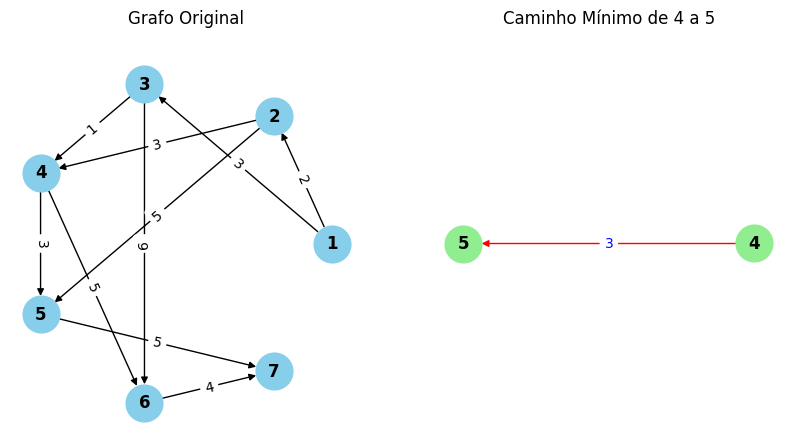

In [37]:
# Função para plotar as matrizes Pc e pai
def plot_matrizes(Pc, pai, title):
    labels = [f'v{i}' for i in range(1, len(Pc)+1)]

    # Plotar matriz Pc
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(Pc, cmap='viridis', interpolation='nearest')
    for i in range(Pc.shape[0]):
        for j in range(Pc.shape[1]):
            plt.text(j, i, Pc[i, j], ha='center', va='center', color='black')
    plt.colorbar()
    plt.xticks(np.arange(len(labels)), labels)
    plt.yticks(np.arange(len(labels)), labels)
    plt.xlabel('Destino')
    plt.ylabel('Origem')
    plt.title(f'Matriz Pc - {title}')

    # Plotar matriz pai
    plt.subplot(1, 2, 2)
    plt.imshow(pai, cmap='viridis', interpolation='nearest')
    for i in range(pai.shape[0]):
        for j in range(pai.shape[1]):
            if pai[i, j] != 0:
                plt.text(j, i, pai[i, j], ha='center', va='center', color='black')
            else:
                plt.text(j, i, 'NULL', ha='center', va='center', color='black')
    plt.colorbar()
    plt.xticks(np.arange(len(labels)), labels)
    plt.yticks(np.arange(len(labels)), labels)
    plt.xlabel('Destino')
    plt.ylabel('Origem')
    plt.title(f'Matriz pai - {title}')

    plt.tight_layout()
    plt.show()


# Algoritmo de Dijkstra para encontrar o caminho mínimo de um vértice a outro
def Dijkstra(G, source, target):
    dist = {node: float('inf') for node in G.nodes()}
    dist[source] = 0
    visited = set()
    parent = {node: None for node in G.nodes()}

    while len(visited) < len(G.nodes()):
        current_node = min((node for node in G.nodes() if node not in visited), key=lambda x: dist[x])
        visited.add(current_node)

        for neighbor, weight in G[current_node].items():
            if dist[current_node] + weight['weight'] < dist[neighbor]:
                dist[neighbor] = dist[current_node] + weight['weight']
                parent[neighbor] = current_node

    # Criar o caminho mínimo
    path = [target]
    while path[-1] != source:
        path.append(parent[path[-1]])
    path.reverse()

    return path, dist

# Escolha dos vértices de origem e destino
source = 4
target = 5

# Encontrar o caminho mínimo
path, dist = Dijkstra(G, source, target)

# Criar um grafo com o caminho mínimo encontrado
G_path = G.subgraph(path)

# Plotar o grafo original e o caminho mínimo
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
pos = nx.circular_layout(G)
nx.draw(G, pos, with_labels=True, node_size=700, node_color='skyblue', font_size=12, font_weight='bold')
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): G[u][v]['weight'] for u, v in G.edges()}, font_color='black')
plt.title('Grafo Original', pad=20)

plt.subplot(1, 2, 2)
pos_path = nx.circular_layout(G_path)
nx.draw(G_path, pos_path, with_labels=True, node_size=700, node_color='lightgreen', font_size=12, font_weight='bold', edge_color='red')
nx.draw_networkx_edge_labels(G_path, pos_path, edge_labels={(u, v): G_path[u][v]['weight'] for u, v in G_path.edges()}, font_color='blue')
plt.title(f'Caminho Mínimo de {source} a {target}', pad=20)

# Matrizes Pc e pai
Pc = np.zeros((len(G), len(G)))
pai = np.zeros((len(G), len(G)))

dist, path = nx.single_source_dijkstra(G, source=source)

for i, node in enumerate(G.nodes()):
    for j, dist_val in dist.items():
        if node != j:
            Pc[i, j-1] = dist_val
            if j in path[node]:
                pai[i, j-1] = path[node][j]

# Plotar as matrizes Pc e pai
plot_matrizes(Pc, pai, f'Caminho Mínimo de {source} a {target}')

plt.tight_layout()
plt.show()

KeyError: 1

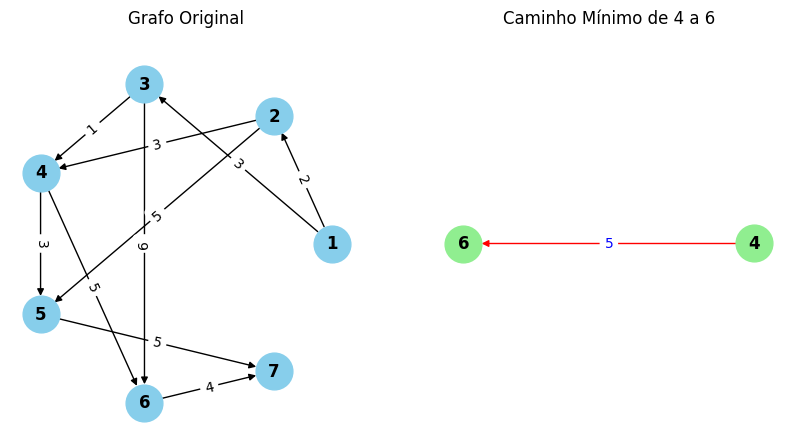

In [38]:
# Função para plotar as matrizes Pc e pai
def plot_matrizes(Pc, pai, title):
    labels = [f'v{i}' for i in range(1, len(Pc)+1)]

    # Plotar matriz Pc
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(Pc, cmap='viridis', interpolation='nearest')
    for i in range(Pc.shape[0]):
        for j in range(Pc.shape[1]):
            plt.text(j, i, Pc[i, j], ha='center', va='center', color='black')
    plt.colorbar()
    plt.xticks(np.arange(len(labels)), labels)
    plt.yticks(np.arange(len(labels)), labels)
    plt.xlabel('Destino')
    plt.ylabel('Origem')
    plt.title(f'Matriz Pc - {title}')

    # Plotar matriz pai
    plt.subplot(1, 2, 2)
    plt.imshow(pai, cmap='viridis', interpolation='nearest')
    for i in range(pai.shape[0]):
        for j in range(pai.shape[1]):
            if pai[i, j] != 0:
                plt.text(j, i, pai[i, j], ha='center', va='center', color='black')
            else:
                plt.text(j, i, 'NULL', ha='center', va='center', color='black')
    plt.colorbar()
    plt.xticks(np.arange(len(labels)), labels)
    plt.yticks(np.arange(len(labels)), labels)
    plt.xlabel('Destino')
    plt.ylabel('Origem')
    plt.title(f'Matriz pai - {title}')

    plt.tight_layout()
    plt.show()


# Algoritmo de Dijkstra para encontrar o caminho mínimo de um vértice a outro
def Dijkstra(G, source, target):
    dist = {node: float('inf') for node in G.nodes()}
    dist[source] = 0
    visited = set()
    parent = {node: None for node in G.nodes()}

    while len(visited) < len(G.nodes()):
        current_node = min((node for node in G.nodes() if node not in visited), key=lambda x: dist[x])
        visited.add(current_node)

        for neighbor, weight in G[current_node].items():
            if dist[current_node] + weight['weight'] < dist[neighbor]:
                dist[neighbor] = dist[current_node] + weight['weight']
                parent[neighbor] = current_node

    # Criar o caminho mínimo
    path = [target]
    while path[-1] != source:
        path.append(parent[path[-1]])
    path.reverse()

    return path, dist

# Escolha dos vértices de origem e destino
source = 4
target = 6

# Encontrar o caminho mínimo
path, dist = Dijkstra(G, source, target)

# Criar um grafo com o caminho mínimo encontrado
G_path = G.subgraph(path)

# Plotar o grafo original e o caminho mínimo
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
pos = nx.circular_layout(G)
nx.draw(G, pos, with_labels=True, node_size=700, node_color='skyblue', font_size=12, font_weight='bold')
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): G[u][v]['weight'] for u, v in G.edges()}, font_color='black')
plt.title('Grafo Original', pad=20)

plt.subplot(1, 2, 2)
pos_path = nx.circular_layout(G_path)
nx.draw(G_path, pos_path, with_labels=True, node_size=700, node_color='lightgreen', font_size=12, font_weight='bold', edge_color='red')
nx.draw_networkx_edge_labels(G_path, pos_path, edge_labels={(u, v): G_path[u][v]['weight'] for u, v in G_path.edges()}, font_color='blue')
plt.title(f'Caminho Mínimo de {source} a {target}', pad=20)

# Matrizes Pc e pai
Pc = np.zeros((len(G), len(G)))
pai = np.zeros((len(G), len(G)))

dist, path = nx.single_source_dijkstra(G, source=source)

for i, node in enumerate(G.nodes()):
    for j, dist_val in dist.items():
        if node != j:
            Pc[i, j-1] = dist_val
            if j in path[node]:
                pai[i, j-1] = path[node][j]

# Plotar as matrizes Pc e pai
plot_matrizes(Pc, pai, f'Caminho Mínimo de {source} a {target}')

plt.tight_layout()
plt.show()

KeyError: 1

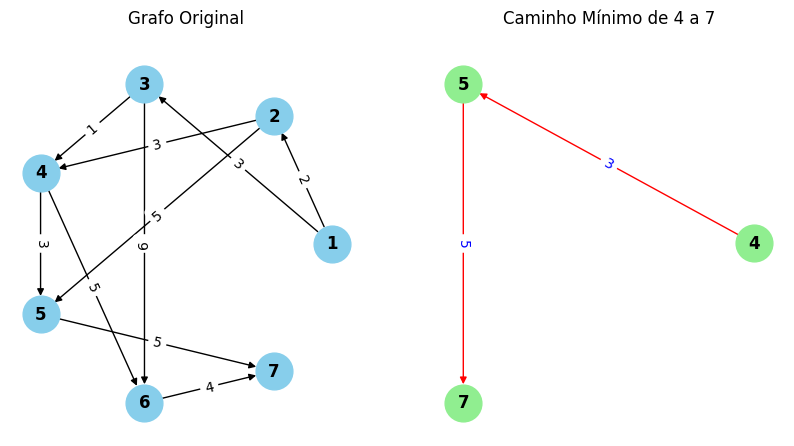

In [39]:
# Função para plotar as matrizes Pc e pai
def plot_matrizes(Pc, pai, title):
    labels = [f'v{i}' for i in range(1, len(Pc)+1)]

    # Plotar matriz Pc
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(Pc, cmap='viridis', interpolation='nearest')
    for i in range(Pc.shape[0]):
        for j in range(Pc.shape[1]):
            plt.text(j, i, Pc[i, j], ha='center', va='center', color='black')
    plt.colorbar()
    plt.xticks(np.arange(len(labels)), labels)
    plt.yticks(np.arange(len(labels)), labels)
    plt.xlabel('Destino')
    plt.ylabel('Origem')
    plt.title(f'Matriz Pc - {title}')

    # Plotar matriz pai
    plt.subplot(1, 2, 2)
    plt.imshow(pai, cmap='viridis', interpolation='nearest')
    for i in range(pai.shape[0]):
        for j in range(pai.shape[1]):
            if pai[i, j] != 0:
                plt.text(j, i, pai[i, j], ha='center', va='center', color='black')
            else:
                plt.text(j, i, 'NULL', ha='center', va='center', color='black')
    plt.colorbar()
    plt.xticks(np.arange(len(labels)), labels)
    plt.yticks(np.arange(len(labels)), labels)
    plt.xlabel('Destino')
    plt.ylabel('Origem')
    plt.title(f'Matriz pai - {title}')

    plt.tight_layout()
    plt.show()


# Algoritmo de Dijkstra para encontrar o caminho mínimo de um vértice a outro
def Dijkstra(G, source, target):
    dist = {node: float('inf') for node in G.nodes()}
    dist[source] = 0
    visited = set()
    parent = {node: None for node in G.nodes()}

    while len(visited) < len(G.nodes()):
        current_node = min((node for node in G.nodes() if node not in visited), key=lambda x: dist[x])
        visited.add(current_node)

        for neighbor, weight in G[current_node].items():
            if dist[current_node] + weight['weight'] < dist[neighbor]:
                dist[neighbor] = dist[current_node] + weight['weight']
                parent[neighbor] = current_node

    # Criar o caminho mínimo
    path = [target]
    while path[-1] != source:
        path.append(parent[path[-1]])
    path.reverse()

    return path, dist

# Escolha dos vértices de origem e destino
source = 4
target = 7

# Encontrar o caminho mínimo
path, dist = Dijkstra(G, source, target)

# Criar um grafo com o caminho mínimo encontrado
G_path = G.subgraph(path)

# Plotar o grafo original e o caminho mínimo
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
pos = nx.circular_layout(G)
nx.draw(G, pos, with_labels=True, node_size=700, node_color='skyblue', font_size=12, font_weight='bold')
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): G[u][v]['weight'] for u, v in G.edges()}, font_color='black')
plt.title('Grafo Original', pad=20)

plt.subplot(1, 2, 2)
pos_path = nx.circular_layout(G_path)
nx.draw(G_path, pos_path, with_labels=True, node_size=700, node_color='lightgreen', font_size=12, font_weight='bold', edge_color='red')
nx.draw_networkx_edge_labels(G_path, pos_path, edge_labels={(u, v): G_path[u][v]['weight'] for u, v in G_path.edges()}, font_color='blue')
plt.title(f'Caminho Mínimo de {source} a {target}', pad=20)

# Matrizes Pc e pai
Pc = np.zeros((len(G), len(G)))
pai = np.zeros((len(G), len(G)))

dist, path = nx.single_source_dijkstra(G, source=source)

for i, node in enumerate(G.nodes()):
    for j, dist_val in dist.items():
        if node != j:
            Pc[i, j-1] = dist_val
            if j in path[node]:
                pai[i, j-1] = path[node][j]

# Plotar as matrizes Pc e pai
plot_matrizes(Pc, pai, f'Caminho Mínimo de {source} a {target}')

plt.tight_layout()
plt.show()

KeyError: 1

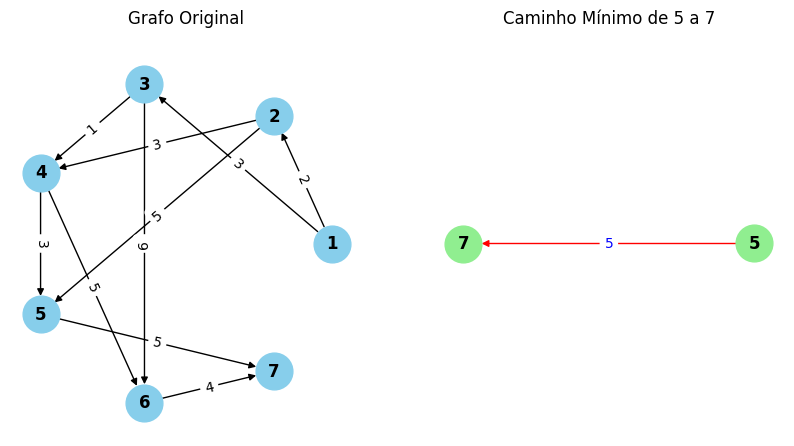

In [40]:
# Função para plotar as matrizes Pc e pai
def plot_matrizes(Pc, pai, title):
    labels = [f'v{i}' for i in range(1, len(Pc)+1)]

    # Plotar matriz Pc
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(Pc, cmap='viridis', interpolation='nearest')
    for i in range(Pc.shape[0]):
        for j in range(Pc.shape[1]):
            plt.text(j, i, Pc[i, j], ha='center', va='center', color='black')
    plt.colorbar()
    plt.xticks(np.arange(len(labels)), labels)
    plt.yticks(np.arange(len(labels)), labels)
    plt.xlabel('Destino')
    plt.ylabel('Origem')
    plt.title(f'Matriz Pc - {title}')

    # Plotar matriz pai
    plt.subplot(1, 2, 2)
    plt.imshow(pai, cmap='viridis', interpolation='nearest')
    for i in range(pai.shape[0]):
        for j in range(pai.shape[1]):
            if pai[i, j] != 0:
                plt.text(j, i, pai[i, j], ha='center', va='center', color='black')
            else:
                plt.text(j, i, 'NULL', ha='center', va='center', color='black')
    plt.colorbar()
    plt.xticks(np.arange(len(labels)), labels)
    plt.yticks(np.arange(len(labels)), labels)
    plt.xlabel('Destino')
    plt.ylabel('Origem')
    plt.title(f'Matriz pai - {title}')

    plt.tight_layout()
    plt.show()


# Algoritmo de Dijkstra para encontrar o caminho mínimo de um vértice a outro
def Dijkstra(G, source, target):
    dist = {node: float('inf') for node in G.nodes()}
    dist[source] = 0
    visited = set()
    parent = {node: None for node in G.nodes()}

    while len(visited) < len(G.nodes()):
        current_node = min((node for node in G.nodes() if node not in visited), key=lambda x: dist[x])
        visited.add(current_node)

        for neighbor, weight in G[current_node].items():
            if dist[current_node] + weight['weight'] < dist[neighbor]:
                dist[neighbor] = dist[current_node] + weight['weight']
                parent[neighbor] = current_node

    # Criar o caminho mínimo
    path = [target]
    while path[-1] != source:
        path.append(parent[path[-1]])
    path.reverse()

    return path, dist

# Escolha dos vértices de origem e destino
source = 5
target = 7

# Encontrar o caminho mínimo
path, dist = Dijkstra(G, source, target)

# Criar um grafo com o caminho mínimo encontrado
G_path = G.subgraph(path)

# Plotar o grafo original e o caminho mínimo
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
pos = nx.circular_layout(G)
nx.draw(G, pos, with_labels=True, node_size=700, node_color='skyblue', font_size=12, font_weight='bold')
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): G[u][v]['weight'] for u, v in G.edges()}, font_color='black')
plt.title('Grafo Original', pad=20)

plt.subplot(1, 2, 2)
pos_path = nx.circular_layout(G_path)
nx.draw(G_path, pos_path, with_labels=True, node_size=700, node_color='lightgreen', font_size=12, font_weight='bold', edge_color='red')
nx.draw_networkx_edge_labels(G_path, pos_path, edge_labels={(u, v): G_path[u][v]['weight'] for u, v in G_path.edges()}, font_color='blue')
plt.title(f'Caminho Mínimo de {source} a {target}', pad=20)

# Matrizes Pc e pai
Pc = np.zeros((len(G), len(G)))
pai = np.zeros((len(G), len(G)))

dist, path = nx.single_source_dijkstra(G, source=source)

for i, node in enumerate(G.nodes()):
    for j, dist_val in dist.items():
        if node != j:
            Pc[i, j-1] = dist_val
            if j in path[node]:
                pai[i, j-1] = path[node][j]

# Plotar as matrizes Pc e pai
plot_matrizes(Pc, pai, f'Caminho Mínimo de {source} a {target}')

plt.tight_layout()
plt.show()

KeyError: 1

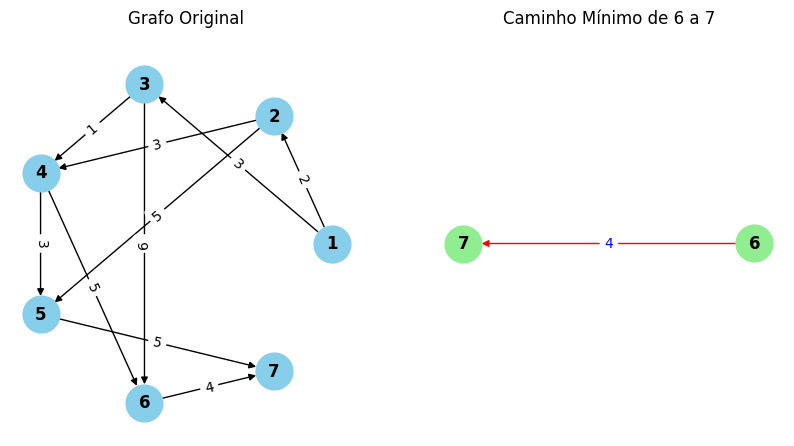

In [41]:
# Função para plotar as matrizes Pc e pai
def plot_matrizes(Pc, pai, title):
    labels = [f'v{i}' for i in range(1, len(Pc)+1)]

    # Plotar matriz Pc
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(Pc, cmap='viridis', interpolation='nearest')
    for i in range(Pc.shape[0]):
        for j in range(Pc.shape[1]):
            plt.text(j, i, Pc[i, j], ha='center', va='center', color='black')
    plt.colorbar()
    plt.xticks(np.arange(len(labels)), labels)
    plt.yticks(np.arange(len(labels)), labels)
    plt.xlabel('Destino')
    plt.ylabel('Origem')
    plt.title(f'Matriz Pc - {title}')

    # Plotar matriz pai
    plt.subplot(1, 2, 2)
    plt.imshow(pai, cmap='viridis', interpolation='nearest')
    for i in range(pai.shape[0]):
        for j in range(pai.shape[1]):
            if pai[i, j] != 0:
                plt.text(j, i, pai[i, j], ha='center', va='center', color='black')
            else:
                plt.text(j, i, 'NULL', ha='center', va='center', color='black')
    plt.colorbar()
    plt.xticks(np.arange(len(labels)), labels)
    plt.yticks(np.arange(len(labels)), labels)
    plt.xlabel('Destino')
    plt.ylabel('Origem')
    plt.title(f'Matriz pai - {title}')

    plt.tight_layout()
    plt.show()


# Algoritmo de Dijkstra para encontrar o caminho mínimo de um vértice a outro
def Dijkstra(G, source, target):
    dist = {node: float('inf') for node in G.nodes()}
    dist[source] = 0
    visited = set()
    parent = {node: None for node in G.nodes()}

    while len(visited) < len(G.nodes()):
        current_node = min((node for node in G.nodes() if node not in visited), key=lambda x: dist[x])
        visited.add(current_node)

        for neighbor, weight in G[current_node].items():
            if dist[current_node] + weight['weight'] < dist[neighbor]:
                dist[neighbor] = dist[current_node] + weight['weight']
                parent[neighbor] = current_node

    # Criar o caminho mínimo
    path = [target]
    while path[-1] != source:
        path.append(parent[path[-1]])
    path.reverse()

    return path, dist

# Escolha dos vértices de origem e destino
source = 6
target = 7

# Encontrar o caminho mínimo
path, dist = Dijkstra(G, source, target)

# Criar um grafo com o caminho mínimo encontrado
G_path = G.subgraph(path)

# Plotar o grafo original e o caminho mínimo
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
pos = nx.circular_layout(G)
nx.draw(G, pos, with_labels=True, node_size=700, node_color='skyblue', font_size=12, font_weight='bold')
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): G[u][v]['weight'] for u, v in G.edges()}, font_color='black')
plt.title('Grafo Original', pad=20)

plt.subplot(1, 2, 2)
pos_path = nx.circular_layout(G_path)
nx.draw(G_path, pos_path, with_labels=True, node_size=700, node_color='lightgreen', font_size=12, font_weight='bold', edge_color='red')
nx.draw_networkx_edge_labels(G_path, pos_path, edge_labels={(u, v): G_path[u][v]['weight'] for u, v in G_path.edges()}, font_color='blue')
plt.title(f'Caminho Mínimo de {source} a {target}', pad=20)

# Matrizes Pc e pai
Pc = np.zeros((len(G), len(G)))
pai = np.zeros((len(G), len(G)))

dist, path = nx.single_source_dijkstra(G, source=source)

for i, node in enumerate(G.nodes()):
    for j, dist_val in dist.items():
        if node != j:
            Pc[i, j-1] = dist_val
            if j in path[node]:
                pai[i, j-1] = path[node][j]

# Plotar as matrizes Pc e pai
plot_matrizes(Pc, pai, f'Caminho Mínimo de {source} a {target}')

plt.tight_layout()
plt.show()